In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
book = pd.read_csv('book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [4]:
book.sum()

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

In [5]:
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


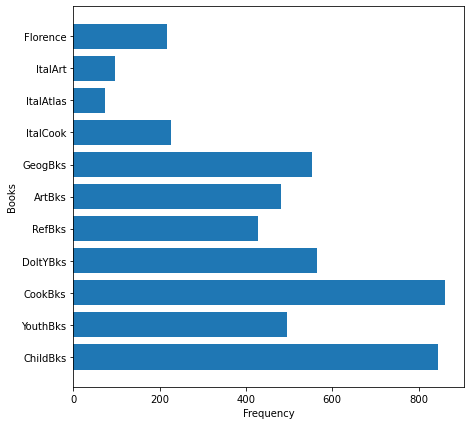

In [6]:
fig, ax = plt.subplots(figsize=(7,7))
plt.barh(book.columns ,book.sum())
plt.ylabel("Books")
plt.xlabel("Frequency")
plt.show()

<AxesSubplot:>

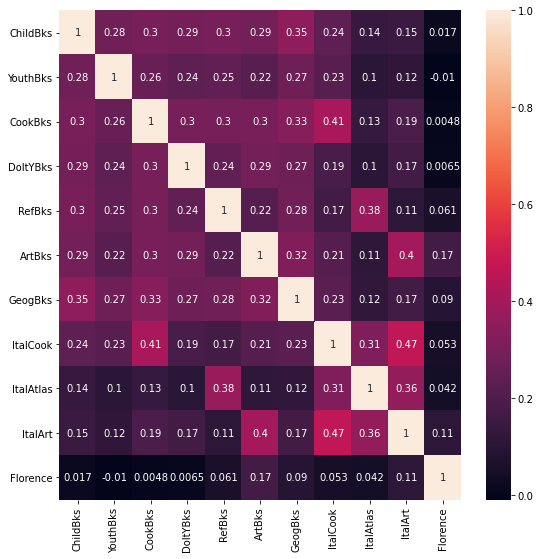

In [7]:
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(book.corr(), annot=True)

In [8]:
#Deleting all rows containing all zero values
book = book[~np.all(book==0,axis=1)]
#book['sum'] = np.sum(book,axis=1)
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1990,1,0,1,1,0,0,1,1,0,0,0
1991,0,0,0,0,0,1,0,0,0,0,0
1992,0,1,1,1,0,1,1,1,0,1,0
1995,0,0,1,0,0,1,1,1,0,1,1


In [9]:
#Dropping the 'sum' column
#book = book.drop('sum',axis=1)
book = book.reset_index(drop=True)
book
#book.iloc[:,1:]

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,0,1,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1574,1,0,1,1,0,0,1,1,0,0,0
1575,0,0,0,0,0,1,0,0,0,0,0
1576,0,1,1,1,0,1,1,1,0,1,0
1577,0,0,1,0,0,1,1,1,0,1,1


# Apriori Algorithm

### 10% Support 

In [10]:
#Maximum length = 3 
frequent_itemsets1 = apriori(book, min_support=0.1, max_len=3, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.535782,(ChildBks)
1,0.313490,(YouthBks)
2,0.545915,(CookBks)
3,0.357188,(DoItYBks)
4,0.271691,(RefBks)
5,0.305256,(ArtBks)
6,0.349588,(GeogBks)
7,0.143762,(ItalCook)
8,0.137429,(Florence)
9,0.208993,"(YouthBks, ChildBks)"


In [11]:
rules1 = association_rules(frequent_itemsets1, metric='lift', min_threshold=1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.313490,0.535782,0.208993,0.666667,1.244287,0.041031,1.392654
1,(ChildBks),(YouthBks),0.535782,0.313490,0.208993,0.390071,1.244287,0.041031,1.125558
2,(CookBks),(ChildBks),0.545915,0.535782,0.324256,0.593968,1.108599,0.031764,1.143302
3,(ChildBks),(CookBks),0.535782,0.545915,0.324256,0.605201,1.108599,0.031764,1.150167
4,(DoItYBks),(ChildBks),0.357188,0.535782,0.233059,0.652482,1.217813,0.041684,1.335811
...,...,...,...,...,...,...,...,...,...
179,"(GeogBks, ArtBks)",(CookBks),0.161495,0.545915,0.131096,0.811765,1.486980,0.042933,2.412326
180,"(CookBks, ArtBks)",(GeogBks),0.211526,0.349588,0.131096,0.619760,1.772829,0.057149,1.710531
181,(GeogBks),"(CookBks, ArtBks)",0.349588,0.211526,0.131096,0.375000,1.772829,0.057149,1.261558
182,(CookBks),"(GeogBks, ArtBks)",0.545915,0.161495,0.131096,0.240139,1.486980,0.042933,1.103499


In [12]:
rules1.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
101,"(CookBks, ChildBks)",(ItalCook),0.324256,0.143762,0.107663,0.332031,2.309592,0.061047,1.281854
104,(ItalCook),"(CookBks, ChildBks)",0.143762,0.324256,0.107663,0.748899,2.309592,0.061047,2.691121
60,"(YouthBks, ChildBks)",(RefBks),0.208993,0.271691,0.105130,0.503030,1.851480,0.048348,1.465500
61,(RefBks),"(YouthBks, ChildBks)",0.271691,0.208993,0.105130,0.386946,1.851480,0.048348,1.290274
102,"(ItalCook, ChildBks)",(CookBks),0.107663,0.545915,0.107663,1.000000,1.831787,0.048888,inf
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.357188,0.535782,0.233059,0.652482,1.217813,0.041684,1.335811
14,(CookBks),(YouthBks),0.545915,0.313490,0.205193,0.375870,1.198988,0.034054,1.099948
15,(YouthBks),(CookBks),0.313490,0.545915,0.205193,0.654545,1.198988,0.034054,1.314456
3,(ChildBks),(CookBks),0.535782,0.545915,0.324256,0.605201,1.108599,0.031764,1.150167


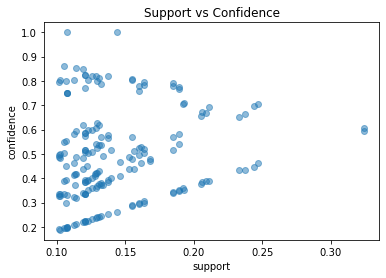

In [13]:
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### 20% Support

In [14]:
#Maximum length = 2 
frequent_itemsets2 = apriori(book, min_support=0.2, max_len=2, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.535782,(ChildBks)
1,0.313490,(YouthBks)
2,0.545915,(CookBks)
3,0.357188,(DoItYBks)
4,0.271691,(RefBks)
5,0.305256,(ArtBks)
6,0.349588,(GeogBks)
7,0.208993,"(YouthBks, ChildBks)"
8,0.324256,"(CookBks, ChildBks)"
9,0.233059,"(DoItYBks, ChildBks)"


In [15]:
rules2 = association_rules(frequent_itemsets2, metric='lift', min_threshold=1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.313490,0.535782,0.208993,0.666667,1.244287,0.041031,1.392654
1,(ChildBks),(YouthBks),0.535782,0.313490,0.208993,0.390071,1.244287,0.041031,1.125558
2,(CookBks),(ChildBks),0.545915,0.535782,0.324256,0.593968,1.108599,0.031764,1.143302
3,(ChildBks),(CookBks),0.535782,0.545915,0.324256,0.605201,1.108599,0.031764,1.150167
4,(DoItYBks),(ChildBks),0.357188,0.535782,0.233059,0.652482,1.217813,0.041684,1.335811
5,(ChildBks),(DoItYBks),0.535782,0.357188,0.233059,0.434988,1.217813,0.041684,1.137696
6,(ArtBks),(ChildBks),0.305256,0.535782,0.205826,0.674274,1.258485,0.042275,1.425178
7,(ChildBks),(ArtBks),0.535782,0.305256,0.205826,0.384161,1.258485,0.042275,1.128125
8,(GeogBks),(ChildBks),0.349588,0.535782,0.246992,0.706522,1.318674,0.059689,1.581779
9,(ChildBks),(GeogBks),0.535782,0.349588,0.246992,0.460993,1.318674,0.059689,1.206685


In [16]:
rules2.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(ChildBks),(GeogBks),0.535782,0.349588,0.246992,0.460993,1.318674,0.059689,1.206685
8,(GeogBks),(ChildBks),0.349588,0.535782,0.246992,0.706522,1.318674,0.059689,1.581779
16,(GeogBks),(CookBks),0.349588,0.545915,0.243825,0.697464,1.277605,0.052980,1.500927
17,(CookBks),(GeogBks),0.545915,0.349588,0.243825,0.446636,1.277605,0.052980,1.175377
14,(CookBks),(ArtBks),0.545915,0.305256,0.211526,0.387471,1.269329,0.044882,1.134221
15,(ArtBks),(CookBks),0.305256,0.545915,0.211526,0.692946,1.269329,0.044882,1.478844
6,(ArtBks),(ChildBks),0.305256,0.535782,0.205826,0.674274,1.258485,0.042275,1.425178
7,(ChildBks),(ArtBks),0.535782,0.305256,0.205826,0.384161,1.258485,0.042275,1.128125
1,(ChildBks),(YouthBks),0.535782,0.313490,0.208993,0.390071,1.244287,0.041031,1.125558
0,(YouthBks),(ChildBks),0.313490,0.535782,0.208993,0.666667,1.244287,0.041031,1.392654


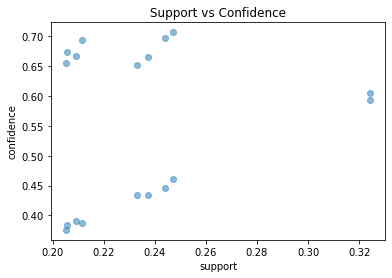

In [17]:
plt.scatter(rules2['support'], rules2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### 5% Support 

In [18]:
#Maximum length = 4 
frequent_itemsets3 = apriori(book, min_support=0.05, max_len=4, use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.535782,(ChildBks)
1,0.313490,(YouthBks)
2,0.545915,(CookBks)
3,0.357188,(DoItYBks)
4,0.271691,(RefBks)
...,...,...
122,0.050032,"(GeogBks, DoItYBks, YouthBks, ArtBks)"
123,0.053832,"(DoItYBks, CookBks, RefBks, ArtBks)"
124,0.062698,"(DoItYBks, CookBks, RefBks, GeogBks)"
125,0.082331,"(DoItYBks, CookBks, GeogBks, ArtBks)"


In [19]:
rules3 = association_rules(frequent_itemsets3, metric='lift', min_threshold=1)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.313490,0.535782,0.208993,0.666667,1.244287,0.041031,1.392654
1,(ChildBks),(YouthBks),0.535782,0.313490,0.208993,0.390071,1.244287,0.041031,1.125558
2,(CookBks),(ChildBks),0.545915,0.535782,0.324256,0.593968,1.108599,0.031764,1.143302
3,(ChildBks),(CookBks),0.535782,0.545915,0.324256,0.605201,1.108599,0.031764,1.150167
4,(DoItYBks),(ChildBks),0.357188,0.535782,0.233059,0.652482,1.217813,0.041684,1.335811
...,...,...,...,...,...,...,...,...,...
845,"(RefBks, ArtBks)","(GeogBks, CookBks)",0.113363,0.243825,0.058265,0.513966,2.107930,0.030624,1.555808
846,(GeogBks),"(CookBks, RefBks, ArtBks)",0.349588,0.088664,0.058265,0.166667,1.879762,0.027269,1.093604
847,(CookBks),"(GeogBks, RefBks, ArtBks)",0.545915,0.071564,0.058265,0.106729,1.491366,0.019197,1.039366
848,(RefBks),"(GeogBks, CookBks, ArtBks)",0.271691,0.131096,0.058265,0.214452,1.635846,0.022647,1.106113


In [20]:
rules3.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
312,"(CookBks, ArtBks)",(ItalArt),0.211526,0.061431,0.051932,0.245509,3.996481,0.038937,1.243976
313,(ItalArt),"(CookBks, ArtBks)",0.061431,0.211526,0.051932,0.845361,3.996481,0.038937,5.098797
57,(ArtBks),(ItalArt),0.305256,0.061431,0.061431,0.201245,3.275934,0.042679,1.175039
315,(ArtBks),"(ItalArt, CookBks)",0.305256,0.051932,0.051932,0.170124,3.275934,0.036079,1.142422
310,"(ItalArt, CookBks)",(ArtBks),0.051932,0.305256,0.051932,1.000000,3.275934,0.036079,inf
...,...,...,...,...,...,...,...,...,...
15,(YouthBks),(CookBks),0.313490,0.545915,0.205193,0.654545,1.198988,0.034054,1.314456
62,(GeogBks),(Florence),0.349588,0.137429,0.053832,0.153986,1.120475,0.005788,1.019570
63,(Florence),(GeogBks),0.137429,0.349588,0.053832,0.391705,1.120475,0.005788,1.069237
3,(ChildBks),(CookBks),0.535782,0.545915,0.324256,0.605201,1.108599,0.031764,1.150167


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


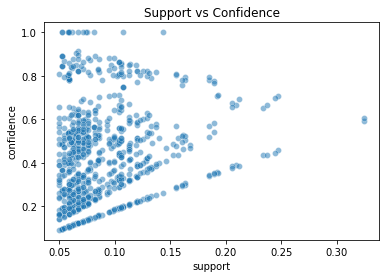

In [21]:
sns.scatterplot(rules3['support'], rules3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()